In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import accuracy_score

In [ ]:
data_clean = pd.read_csv("data_cleaned.csv") #cleaned data
data_clean

,Unnamed: 0,case_month,state_fips_code,county_fips_code,age_group,male,race,HispanicLatino,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,147,2020-05-01,19.0,19167.0,50 to 64 years,1,White,1,1.0,0.0,Clinical evaluation,1.0,1,1,1.0,0.0,0.0,1
1,256,2020-04-01,19.0,19193.0,0 - 17 years,1,White,1,2.0,0.0,Clinical evaluation,1.0,1,1,0.0,0.0,0.0,1
2,538,2020-12-01,39.0,39039.0,18 to 49 years,1,White,1,1.0,0.0,Clinical evaluation,1.0,1,1,0.0,0.0,0.0,1
3,802,2020-06-01,20.0,20037.0,18 to 49 years,0,White,1,0.0,0.0,Routine surveillance,1.0,1,1,0.0,0.0,0.0,1
4,1296,2020-08-01,20.0,20111.0,18 to 49 years,0,White,1,1.0,0.0,Multiple,1.0,1,1,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92426,32956272,2021-05-01,32.0,32003.0,65+ years,1,White,0,1.0,0.0,Multiple,1.0,1,1,1.0,0.0,1.0,1
92427,32956434,2021-05-01,32.0,32003.0,65+ years,1,White,0,0.0,0.0,Multiple,1.0,1,1,1.0,0.0,0.0,1
92428,32956602,2021-05-01,32.0,32003.0,65+ years,1,White,0,1.0,0.0,Routine surveillance,1.0,1,1,0.0,0.0,0.0,1
92429,32956691,2021-05-01,32.0,32003.0,65+ years,1,White,0,0.0,0.0,Multiple,1.0,1,1,1.0,0.0,1.0,1


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92431 entries, 0 to 92430
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       92431 non-null  int64  
 1   case_month                       92431 non-null  object 
 2   state_fips_code                  92431 non-null  float64
 3   county_fips_code                 92431 non-null  float64
 4   age_group                        92431 non-null  object 
 5   male                             92431 non-null  int64  
 6   race                             92431 non-null  object 
 7   HispanicLatino                   92431 non-null  int64  
 8   case_positive_specimen_interval  92431 non-null  float64
 9   case_onset_interval              92431 non-null  float64
 10  process                          92431 non-null  object 
 11  exposure_yn                      92431 non-null  float64
 12  current_status    

In [ ]:
#from google.colab import drive

data_clean.process

0         Clinical evaluation
1         Clinical evaluation
2         Clinical evaluation
3        Routine surveillance
4                    Multiple
                 ...         
92426                Multiple
92427                Multiple
92428    Routine surveillance
92429                Multiple
92430    Routine surveillance
Name: process, Length: 92431, dtype: object

In [ ]:
data_clean = data_clean.rename(columns = {"Clinical evaluation": "Clinical_evaluation", "Routine surveillance": "Routine_surveillance"})

In [ ]:
data_clean.corr()

,Unnamed: 0,state_fips_code,county_fips_code,male,HispanicLatino,case_positive_specimen_interval,case_onset_interval,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
Unnamed: 0,1.000000,0.210688,0.208564,0.025627,0.118196,0.034450,-0.068822,0.165899,NaN,NaN,-0.005431,0.024134,0.039708,0.126032
state_fips_code,0.210688,1.000000,0.999985,-0.013925,-0.093576,-0.013567,-0.100534,-0.005772,NaN,NaN,-0.100094,-0.053591,-0.038517,0.050296
county_fips_code,0.208564,0.999985,1.000000,-0.014028,-0.094100,-0.013744,-0.100335,-0.006464,NaN,NaN,-0.100512,-0.053913,-0.038824,0.049132
male,0.025627,-0.013925,-0.014028,1.000000,0.006115,0.001214,-0.016991,-0.021622,NaN,NaN,0.027274,0.038696,0.021035,0.020622
HispanicLatino,0.118196,-0.093576,-0.094100,0.006115,1.000000,0.019730,-0.027101,0.095785,NaN,NaN,-0.013449,0.012979,-0.010498,-0.017863
case_positive_specimen_interval,0.034450,-0.013567,-0.013744,0.001214,0.019730,1.000000,-0.018568,-0.000621,NaN,NaN,0.017535,0.017990,0.002018,0.007695
case_onset_interval,-0.068822,-0.100534,-0.100335,-0.016991,-0.027101,-0.018568,1.000000,-0.004703,NaN,NaN,-0.002673,-0.008422,0.004860,0.033696
exposure_yn,0.165899,-0.005772,-0.006464,-0.021622,0.095785,-0.000621,-0.004703,1.000000,NaN,NaN,-0.055631,-0.013420,0.010840,0.015222
current_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symptom_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_clean

,Unnamed: 0,case_month,state_fips_code,county_fips_code,age_group,male,race,HispanicLatino,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,147,2020-05-01,19.0,19167.0,50 to 64 years,1,White,1,1.0,0.0,Clinical evaluation,1.0,1,1,1.0,0.0,0.0,1
1,256,2020-04-01,19.0,19193.0,0 - 17 years,1,White,1,2.0,0.0,Clinical evaluation,1.0,1,1,0.0,0.0,0.0,1
2,538,2020-12-01,39.0,39039.0,18 to 49 years,1,White,1,1.0,0.0,Clinical evaluation,1.0,1,1,0.0,0.0,0.0,1
3,802,2020-06-01,20.0,20037.0,18 to 49 years,0,White,1,0.0,0.0,Routine surveillance,1.0,1,1,0.0,0.0,0.0,1
4,1296,2020-08-01,20.0,20111.0,18 to 49 years,0,White,1,1.0,0.0,Multiple,1.0,1,1,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92426,32956272,2021-05-01,32.0,32003.0,65+ years,1,White,0,1.0,0.0,Multiple,1.0,1,1,1.0,0.0,1.0,1
92427,32956434,2021-05-01,32.0,32003.0,65+ years,1,White,0,0.0,0.0,Multiple,1.0,1,1,1.0,0.0,0.0,1
92428,32956602,2021-05-01,32.0,32003.0,65+ years,1,White,0,1.0,0.0,Routine surveillance,1.0,1,1,0.0,0.0,0.0,1
92429,32956691,2021-05-01,32.0,32003.0,65+ years,1,White,0,0.0,0.0,Multiple,1.0,1,1,1.0,0.0,1.0,1


In [ ]:
data_clean
#covid_cases["deaths"][covid_cases["deaths"] == np.nan]
from sklearn.model_selection import train_test_split
covid_cases
y = covid_cases['hosp_yn']
X = covid_cases.drop(['hosp_yn'], axis=1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #covid_cases  
                                                    #stratify = covid_cases['deaths'],
                                                    #random_state=88,)
trainc, testc = train_test_split(data_clean, test_size= .3 ,random_state=88 )                                                  
#X_train.shape, X_test.shape
#train = train.drop(["index"], axis = 1)
trainc["death_yn"] = np.int64(trainc["death_yn"])
trainc["case_positive_specimen_interval"] = np.int64(trainc["case_positive_specimen_interval"])
trainc["case_onset_interval"] = np.int64(trainc["case_onset_interval"])
trainc["exposure_yn"] = np.int64(trainc["exposure_yn"])
trainc["hosp_yn"] = np.int64(trainc["hosp_yn"])
trainc["icu_yn"] = np.int64(trainc["icu_yn"])
trainc["state_fips_code"] = np.int64(trainc["state_fips_code"])
trainc["county_fips_code"] = np.int64(trainc["county_fips_code"])
trainc["symptom_status"] = np.int64(trainc["symptom_status"])
trainc["HispanicLatino"] = np.int64(trainc["HispanicLatino"])
trainc["male"] = np.int64(trainc["male"])
#trainc["process"] = np.int64(trainc["process"])
trainc["underlying_conditions_yn"] = np.int64(trainc["underlying_conditions_yn"])
#train[""] = np.int64(train[""])
#train.10to
#logreg = smf.logit(formula = "death_yn ~ state_fips_code + county_fips_code + case_positive_specimen_interval + case_onset_interval + exposure_yn + hosp_yn + icu_yn + res_state_CO + res_state_IA + res_state_ID	+ res_state_KS + res_state_KY + res_state_LA + res_state_NV + res_state_NY + res_state_OH + res_state_UT + res_state_VT	+ res_county_ADAMS + res_county_ALLEN	+ res_county_ANDERSON	+ res_county_ASHLAND + res_county_ASHTABULA + res_county_ATHENS + res_county_BANNOCK + res_county_BARREN + res_county_BARTON + res_county_BELL + res_county_BELMONT + res_county_BENTON + res_county_BINGHAM + res_county_BLACK_HAWK + res_county_BLAINE + res_county_BOYD + res_county_BOYLE + res_county_BREMER	+ res_county_BUTLER + res_county_CACHE + res_county_WAPELLO + res_county_WARREN + res_county_WASATCH + res_county_WASHINGTON + res_county_WASHOE + res_county_WAYNE + res_county_WEBER + res_county_WEBSTER + res_county_WELD	+ res_county_WILLIAMS + res_county_WINDHAM + res_county_WOOD	+ res_county_WOODBURY	+ res_county_WOODFORD + res_county_WYANDOT + res_county_WYANDOTTE + Years_0_17 + Years_18_49 + Years_50_64 + Years_65_plus + sex_Female + sex_Male + race_American_Indian_Alaska_Native + race_Asian + race_Black + race_Multiple_Other + race_Native_Hawaiian_Other_Pacific_Islander + race_White + ethnicity_Hispanic_Latino + ethnicity_Non_Hispanic_Latino + process_Clinical_evaluation + process_Contact_tracing_of_case_patient + process_Laboratory_reported + process_Multiple + process_Other + process_Provider_reported + process_Routine_surveillance + current_status_Laboratory_confirmed_case + current_status_Probable_Case + symptom_status_Symptomatic",
                       #data = train).fit()
trainc

,Unnamed: 0,case_month,state_fips_code,county_fips_code,age_group,male,race,HispanicLatino,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
55596,20256472,2020-06-01,49,49011,50 to 64 years,1,White,0,0,0,Clinical evaluation,1,1,1,0,0,0,1
89185,32266160,2020-12-01,32,32003,18 to 49 years,1,Black,0,1,0,Multiple,1,1,1,1,1,0,1
3769,1332670,2020-10-01,49,49005,18 to 49 years,0,White,0,1,0,Laboratory reported,1,1,1,0,0,0,1
70458,26114198,2021-02-01,32,32003,50 to 64 years,0,Black,0,1,0,Routine surveillance,1,1,1,0,0,0,1
59323,21999834,2021-05-01,39,39113,0 - 17 years,0,Black,0,0,0,Clinical evaluation,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,22830629,2021-09-01,39,39017,0 - 17 years,1,Black,0,0,0,Clinical evaluation,1,1,1,0,0,0,0
56212,20466628,2021-03-01,39,39061,18 to 49 years,0,Black,0,1,0,Clinical evaluation,1,1,1,0,0,0,1
90474,32557419,2020-08-01,32,32003,65+ years,1,Black,0,1,0,Multiple,1,1,1,0,0,0,1
2481,981122,2020-09-01,20,20045,18 to 49 years,0,White,0,0,0,Multiple,1,1,1,0,0,0,1


In [ ]:
trainc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64701 entries, 55596 to 36815
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       64701 non-null  int64 
 1   case_month                       64701 non-null  object
 2   state_fips_code                  64701 non-null  int64 
 3   county_fips_code                 64701 non-null  int64 
 4   age_group                        64701 non-null  object
 5   male                             64701 non-null  int64 
 6   race                             64701 non-null  object
 7   HispanicLatino                   64701 non-null  int64 
 8   case_positive_specimen_interval  64701 non-null  int64 
 9   case_onset_interval              64701 non-null  int64 
 10  process                          64701 non-null  object
 11  exposure_yn                      64701 non-null  int64 
 12  current_status              

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import accuracy_score


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import accuracy_score


In [ ]:
#"Years_18_49", "age_group_50 to 64 years": "Years_50_64", "age_group_65+ years": "Years_65_plus", "race_American Indian/Alaska Native" : "race_American_Indian_Alaska_Native", "race_Multiple/Other" : "race_Multiple_Other", "race_Native Hawaiian/Other Pacific Islander": "race_Native_Hawaiian_Other_Pacific_Islander", "ethnicity_Hispanic/Latino":"ethnicity_Hispanic_Latino", "ethnicity_Non-Hispanic/Latino" : "ethnicity_Non_Hispanic_Latino", "process_Clinical evaluation": "process_Clinical_evaluation", "process_Contact tracing of case patient": "process_Contact_tracing_of_case_patient", "process_Laboratory reported": "process_Laboratory_reported", "process_Provider reported":"process_Provider_reported", "process_Routine surveillance": "process_Routine_surveillance", "current_status_Laboratory-confirmed case":"current_status_Laboratory_confirmed_case", "current_status_Probable Case": "current_status_Probable_Case", "res_county_BLACK HAWK": "res_county_BLACK_HAWK"})


In [ ]:
data_clean = pd.get_dummies(data_clean, columns = ["age_group", "process", "race"])
data_clean = data_clean.rename(columns = {"Unnamed: 0": "una","age_group_0 - 17 years": "Years_0_17", "age_group_18 to 49 years": "Years_18_49", "age_group_50 to 64 years": "Years_50_64", "age_group_65+ years": "Years_65_plus", "race_American Indian/Alaska Native" : "race_American_Indian_Alaska_Native", "race_Multiple/Other" : "race_Multiple_Other", "race_Native Hawaiian/Other Pacific Islander": "race_Native_Hawaiian_Other_Pacific_Islander", "ethnicity_Hispanic/Latino":"ethnicity_Hispanic_Latino", "ethnicity_Non-Hispanic/Latino" : "ethnicity_Non_Hispanic_Latino", "process_Clinical evaluation": "process_Clinical_evaluation", "process_Contact tracing of case patient": "process_Contact_tracing_of_case_patient", "process_Laboratory reported": "process_Laboratory_reported", "process_Provider reported":"process_Provider_reported", "process_Routine surveillance": "process_Routine_surveillance", "current_status_Laboratory-confirmed case":"current_status_Laboratory_confirmed_case", "current_status_Probable Case": "current_status_Probable_Case", "res_county_BLACK HAWK": "res_county_BLACK_HAWK", "process_Other detection method (specify)": "process_Other_detect", "process_Routine physical examination": "process_Routine"})
data_clean = data_clean.drop(["una"], axis = 1)

In [ ]:
data_clean #.info()
#data_clean = data_clean.drop(["case_month", "state_fips_code", "county_fips_code"], axis = 1)
data_clean

,case_month,state_fips_code,county_fips_code,male,HispanicLatino,case_positive_specimen_interval,case_onset_interval,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,Years_0_17,Years_18_49,Years_50_64,Years_65_plus,process_Clinical_evaluation,process_Contact_tracing_of_case_patient,process_Laboratory_reported,process_Missing,process_Multiple,process_Other,process_Other_detect,process_Provider_reported,process_Routine,process_Routine_surveillance,race_American_Indian_Alaska_Native,race_Asian,race_Black,race_Multiple_Other,race_Native_Hawaiian_Other_Pacific_Islander,race_White
0,2020-05-01,19.0,19167.0,1,1,1.0,0.0,1.0,1,1,1.0,0.0,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2020-04-01,19.0,19193.0,1,1,2.0,0.0,1.0,1,1,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2020-12-01,39.0,39039.0,1,1,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2020-06-01,20.0,20037.0,0,1,0.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2020-08-01,20.0,20111.0,0,1,1.0,0.0,1.0,1,1,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92426,2021-05-01,32.0,32003.0,1,0,1.0,0.0,1.0,1,1,1.0,0.0,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
92427,2021-05-01,32.0,32003.0,1,0,0.0,0.0,1.0,1,1,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
92428,2021-05-01,32.0,32003.0,1,0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
92429,2021-05-01,32.0,32003.0,1,0,0.0,0.0,1.0,1,1,1.0,0.0,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
trainc, testc = train_test_split(data_clean, test_size= .3 , random_state=88 )
trainc

,case_month,state_fips_code,county_fips_code,male,HispanicLatino,case_positive_specimen_interval,case_onset_interval,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,Years_0_17,Years_18_49,Years_50_64,Years_65_plus,process_Clinical_evaluation,process_Contact_tracing_of_case_patient,process_Laboratory_reported,process_Missing,process_Multiple,process_Other,process_Other_detect,process_Provider_reported,process_Routine,process_Routine_surveillance,race_American_Indian_Alaska_Native,race_Asian,race_Black,race_Multiple_Other,race_Native_Hawaiian_Other_Pacific_Islander,race_White
55596,2020-06-01,49.0,49011.0,1,0,0.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89185,2020-12-01,32.0,32003.0,1,0,1.0,0.0,1.0,1,1,1.0,1.0,0.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3769,2020-10-01,49.0,49005.0,0,0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
70458,2021-02-01,32.0,32003.0,0,0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
59323,2021-05-01,39.0,39113.0,0,0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,2021-09-01,39.0,39017.0,1,0,0.0,0.0,1.0,1,1,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
56212,2021-03-01,39.0,39061.0,0,0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
90474,2020-08-01,32.0,32003.0,1,0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2481,2020-09-01,20.0,20045.0,0,0,0.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:

trainc["death_yn"] = np.int64(trainc["death_yn"])
trainc["case_positive_specimen_interval"] = np.int64(trainc["case_positive_specimen_interval"])
trainc["case_onset_interval"] = np.int64(trainc["case_onset_interval"])
trainc["exposure_yn"] = np.int64(trainc["exposure_yn"])
trainc["hosp_yn"] = np.int64(trainc["hosp_yn"])
trainc["icu_yn"] = np.int64(trainc["icu_yn"])
#trainc["state_fips_code"] = np.int64(trainc["state_fips_code"])
#trainc["county_fips_code"] = np.int64(trainc["county_fips_code"])
trainc["symptom_status"] = np.int64(trainc["symptom_status"])
trainc["HispanicLatino"] = np.int64(trainc["HispanicLatino"])
trainc["male"] = np.int64(trainc["male"])
#trainc["process"] = np.int64(trainc["process"])
trainc["underlying_conditions_yn"] = np.int64(trainc["underlying_conditions_yn"])
trainc["Years_0_17"] = np.int64(trainc["Years_0_17"])
trainc["Years_18_49"] = np.int64(trainc["Years_18_49"])
trainc["Years_50_64"] = np.int64(trainc["Years_50_64"])
trainc["process_Clinical_evaluation"] = np.int64(trainc["process_Clinical_evaluation"])
trainc["process_Contact_tracing_of_case_patient"] = np.int64(trainc["process_Contact_tracing_of_case_patient"])
trainc["process_Laboratory_reported"] = np.int64(trainc["process_Laboratory_reported"])
trainc["process_Routine_surveillance"] = np.int64(trainc["process_Routine_surveillance"])
trainc["process_Other_detect"] = np.int64(trainc["process_Other_detect"])
trainc["process_Provider_reported"] = np.int64(trainc["process_Provider_reported"])
trainc["process_Multiple"] = np.int64(trainc["process_Multiple"])
trainc["process_Missing"] = np.int64(trainc["process_Missing"])
trainc["process_Other"] = np.int64(trainc["process_Other"])
trainc["process_Routine"] = np.int64(trainc["process_Routine"])
trainc["Years_65_plus"] = np.int64(trainc["Years_65_plus"])
trainc["race_American_Indian_Alaska_Native"] = np.int64(trainc["race_American_Indian_Alaska_Native"])
trainc["race_Native_Hawaiian_Other_Pacific_Islander"] = np.int64(trainc["race_Native_Hawaiian_Other_Pacific_Islander"])
trainc["race_Multiple_Other"] = np.int64(trainc["race_Multiple_Other"])
trainc["race_Black"] = np.int64(trainc["race_Black"])
trainc["race_Asian"] = np.int64(trainc["race_Asian"])
trainc["race_White"] = np.int64(trainc["race_White"])
#train[""] = np.int64(train[""])
#train[""] = np.int64(train[""])
#train.10to
#logreg = smf.logit(formula = "death_yn ~ state_fips_code + county_fips_code + case_positive_specimen_interval + case_onset_interval + exposure_yn + hosp_yn + icu_yn + res_state_CO + res_state_IA + res_state_ID	+ res_state_KS + res_state_KY + res_state_LA + res_state_NV + res_state_NY + res_state_OH + res_state_UT + res_state_VT	+ res_county_ADAMS + res_county_ALLEN	+ res_county_ANDERSON	+ res_county_ASHLAND + res_county_ASHTABULA + res_county_ATHENS + res_county_BANNOCK + res_county_BARREN + res_county_BARTON + res_county_BELL + res_county_BELMONT + res_county_BENTON + res_county_BINGHAM + res_county_BLACK_HAWK + res_county_BLAINE + res_county_BOYD + res_county_BOYLE + res_county_BREMER	+ res_county_BUTLER + res_county_CACHE + res_county_WAPELLO + res_county_WARREN + res_county_WASATCH + res_county_WASHINGTON + res_county_WASHOE + res_county_WAYNE + res_county_WEBER + res_county_WEBSTER + res_county_WELD	+ res_county_WILLIAMS + res_county_WINDHAM + res_county_WOOD	+ res_county_WOODBURY	+ res_county_WOODFORD + res_county_WYANDOT + res_county_WYANDOTTE + Years_0_17 + Years_18_49 + Years_50_64 + Years_65_plus + sex_Female + sex_Male + race_American_Indian_Alaska_Native + race_Asian + race_Black + race_Multiple_Other + race_Native_Hawaiian_Other_Pacific_Islander + race_White + ethnicity_Hispanic_Latino + ethnicity_Non_Hispanic_Latino + process_Clinical_evaluation + process_Contact_tracing_of_case_patient + process_Laboratory_reported + process_Multiple + process_Other + process_Provider_reported + process_Routine_surveillance + current_status_Laboratory_confirmed_case + current_status_Probable_Case + symptom_status_Symptomatic",


                  #data = train).fit()
trainc

,case_month,state_fips_code,county_fips_code,male,HispanicLatino,case_positive_specimen_interval,case_onset_interval,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,Years_0_17,Years_18_49,Years_50_64,Years_65_plus,process_Clinical_evaluation,process_Contact_tracing_of_case_patient,process_Laboratory_reported,process_Missing,process_Multiple,process_Other,process_Other_detect,process_Provider_reported,process_Routine,process_Routine_surveillance,race_American_Indian_Alaska_Native,race_Asian,race_Black,race_Multiple_Other,race_Native_Hawaiian_Other_Pacific_Islander,race_White
55596,2020-06-01,49.0,49011.0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89185,2020-12-01,32.0,32003.0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3769,2020-10-01,49.0,49005.0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
70458,2021-02-01,32.0,32003.0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
59323,2021-05-01,39.0,39113.0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,2021-09-01,39.0,39017.0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
56212,2021-03-01,39.0,39061.0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
90474,2020-08-01,32.0,32003.0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2481,2020-09-01,20.0,20045.0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
trainc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64701 entries, 55596 to 36815
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   case_month                                   64701 non-null  object 
 1   state_fips_code                              64701 non-null  float64
 2   county_fips_code                             64701 non-null  float64
 3   male                                         64701 non-null  int64  
 4   HispanicLatino                               64701 non-null  int64  
 5   case_positive_specimen_interval              64701 non-null  int64  
 6   case_onset_interval                          64701 non-null  int64  
 7   exposure_yn                                  64701 non-null  int64  
 8   current_status                               64701 non-null  int64  
 9   symptom_status                               64701 non-null  int64  

In [ ]:
baselinacc = sum(testc["death_yn"] == 0) / len(testc)
print(baselinacc)

0.986332491886044


In [ ]:
#trainc = np.int64(trainc[["case_positive_specimen_interval", "case_onset_interval"]]) #case_positive_specimen_interval + case_onset_interval underlying_conditions_yn +
logreg5 = smf.logit(formula = "death_yn ~ male + hosp_yn + icu_yn + exposure_yn + underlying_conditions_yn + process_Other + case_positive_specimen_interval + process_Routine + HispanicLatino + Years_0_17 + Years_18_49 + Years_50_64 + Years_65_plus + process_Clinical_evaluation + process_Contact_tracing_of_case_patient + process_Laboratory_reported + process_Multiple + process_Other + process_Other_detect + process_Provider_reported + process_Routine_surveillance + race_American_Indian_Alaska_Native + race_Asian + race_Black + race_Multiple_Other + race_Native_Hawaiian_Other_Pacific_Islander + race_White",
                       data = trainc).fit() #male + symptom_status + hosp_yn + icu_yn process_Missing + process_Other + process_Routine
print(logreg5.summary()) #current_status +

         Current function value: 0.042209
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:               death_yn   No. Observations:                64701
Model:                          Logit   Df Residuals:                    64676
Method:                           MLE   Df Model:                           24
Date:                Thu, 02 Dec 2021   Pseudo R-squ.:                  0.4514
Time:                        23:27:42   Log-Likelihood:                -2730.9
converged:                      False   LL-Null:                       -4978.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -15.3556        nan        nan        nan         nan         nan
male                            

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [ ]:
logreg6 = smf.logit(formula = "death_yn ~ hosp_yn + icu_yn + exposure_yn + underlying_conditions_yn + HispanicLatino + process_Clinical_evaluation + process_Routine_surveillance + process_Laboratory_reported + process_Contact_tracing_of_case_patient",
                       data = trainc).fit() #male + symptom_status + hosp_yn + icu_yn process_Missing + process_Other + process_Routine
print(logreg6.summary())

Optimization terminated successfully.
         Current function value: 0.055372
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               death_yn   No. Observations:                64701
Model:                          Logit   Df Residuals:                    64691
Method:                           MLE   Df Model:                            9
Date:                Thu, 02 Dec 2021   Pseudo R-squ.:                  0.2803
Time:                        23:27:43   Log-Likelihood:                -3582.6
converged:                       True   LL-Null:                       -4978.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -9.285

In [ ]:
y_test = testc['death_yn']
X_test = testc.drop(['death_yn'], axis = 1)
y_pred_1 = logreg6.predict(X_test)
y_pred_1 = pd.Series([1 if (i >= .5) else 0 for i in y_pred_1])
acc_log_f = accuracy_score(y_test, y_pred_1)
acc_log_f

0.986332491886044

In [ ]:
trainc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64701 entries, 55596 to 36815
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   case_month                                   64701 non-null  object 
 1   state_fips_code                              64701 non-null  float64
 2   county_fips_code                             64701 non-null  float64
 3   male                                         64701 non-null  int64  
 4   HispanicLatino                               64701 non-null  int64  
 5   case_positive_specimen_interval              64701 non-null  int64  
 6   case_onset_interval                          64701 non-null  int64  
 7   exposure_yn                                  64701 non-null  int64  
 8   current_status                               64701 non-null  int64  
 9   symptom_status                               64701 non-null  int64  

In [ ]:
trainc
trainc = trainc.drop(["county_fips_code"], axis = 1)
trainc = trainc.drop(["state_fips_code"], axis = 1)
trainc = trainc.drop(["case_month"], axis = 1)
trainc

,male,HispanicLatino,case_positive_specimen_interval,case_onset_interval,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,Years_0_17,Years_18_49,Years_50_64,Years_65_plus,process_Clinical_evaluation,process_Contact_tracing_of_case_patient,process_Laboratory_reported,process_Missing,process_Multiple,process_Other,process_Other_detect,process_Provider_reported,process_Routine,process_Routine_surveillance,race_American_Indian_Alaska_Native,race_Asian,race_Black,race_Multiple_Other,race_Native_Hawaiian_Other_Pacific_Islander,race_White
55596,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89185,1,0,1,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3769,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
70458,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
59323,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
56212,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
90474,1,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2481,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train = trainc.drop(['death_yn'], axis = 1)
#X_train = train.drop(['case_month'], axis = 1) 
y_train = trainc["death_yn"] 
#X_train = X_train[["age_group", "sex", "race", "ethnicity", "hosp_yn","icu_yn", "process", "current_status"]]
# 
X_train = X_train #.astype("int64")
#X_train.info()
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import DecisionTreeRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 

# use of the Cart System on DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
'min_samples_leaf': [5],'min_samples_split': [20],
        'max_depth': [30],
            #'class_weight' : [{0: 1, 1: 36*2}],
                'random_state': [88]}

dtc = DecisionTreeClassifier()


            
#dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv = 10, verbose = 1) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
            

In [ ]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data
#gets the ccp values from the results gathered from the DecisionTreeClassifier.
possible_values = pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}) #.head(20)
possible_values

,ccp alpha,Validation Accuracy
0,0,0.985920
1,0.0005,0.985224
2,0.001,0.985224
3,0.0015,0.985224
4,0.002,0.985224
...,...,...
196,0.098,0.985224
197,0.0985,0.985224
198,0.099,0.985224
199,0.0995,0.985224


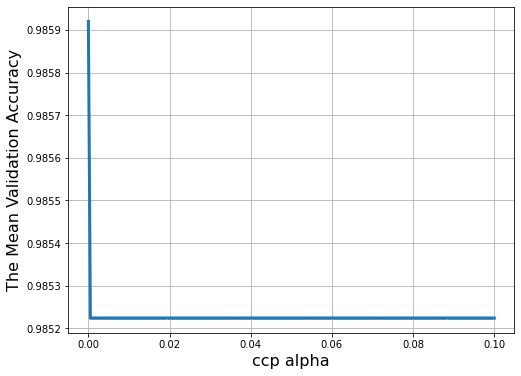

In [ ]:
# from lab, we plot the ccp values with the mean validation accurcacies.
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('The Mean Validation Accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [ ]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)
# the best ccp alpha value is 0
# accuracy is 0.9948871549111166

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  0.9859198559642032


Node count = 1079


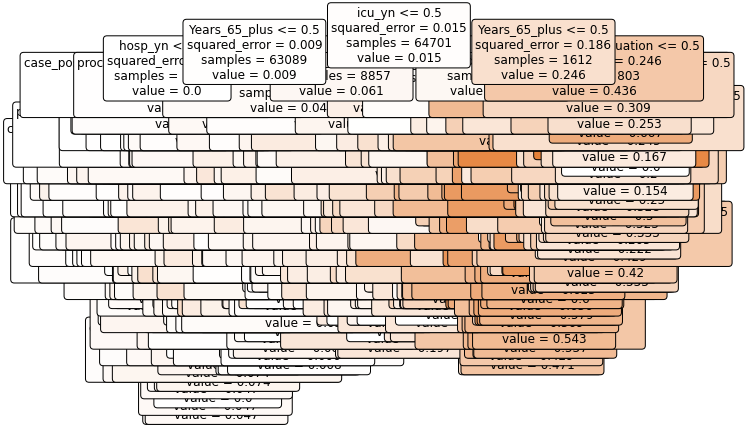

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha= 0,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

# Here we use a decision tree classification like as in the question 
#with the best ccpalpha of 0.



print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          #class_names=['0','1'], 
          filled=True,
          impurity = True,
          rounded=True,
          fontsize=12)
plt.show() # show the node count with the ccalpha through a plot tree

In [ ]:
testc = testc.drop(["county_fips_code"], axis = 1)
testc = testc.drop(["state_fips_code"], axis = 1)
testc = testc.drop(["case_month"], axis = 1)

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split=10, 
                            ccp_alpha= 0,
                            random_state = 88)
dtc = dtr.fit(X_train, y_train)
y_test = testc['death_yn']
X_test = testc.drop(['death_yn'], axis = 1)
y_pred_2 = dtc.predict(X_test)
y_pred_2_1 = dtr.predict(X_test)
#print(y_pred_2_1)
y_pred_2 = np.int64(y_pred_2)
print(np.int64(y_pred_2))

[0 0 0 ... 0 0 0]


In [ ]:
acc_cart = accuracy_score(y_test, y_pred_2)
acc_cart

0.9862964298593581

In [ ]:
# random forests classifier geting values to fit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features= 18, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
# Note: you can change the verbose parameter to control how much training progress is printed.
rf.fit(X_train, y_train)
#

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   21.0s finished


RandomForestClassifier(max_features=18, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=2)

In [ ]:
rf.verbose = False

#OSR^2 calculation for future problems
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

print('OSR2:', round(OSR2(rf, X_test, y_test, y_train), 5))

OSR2: 0.02101


In [ ]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)
# data table for variable selection

,Feature,Importance score
0,male,3.7
1,HispanicLatino,2.5
2,case_positive_specimen_interval,6.6
3,case_onset_interval,1.9
4,exposure_yn,1.8
5,current_status,0.0
6,symptom_status,0.0
7,hosp_yn,7.4
8,icu_yn,31.5
9,underlying_conditions_yn,0.3


In [ ]:
y_pred_3_2 = rf.predict(X_test)
print(y_pred_3_2)

[0 0 0 ... 0 0 0]


In [ ]:
acc_rf = accuracy_score(y_test, y_pred_3_2)
acc_rf #0.9850968703427719

0.9868012982329607

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_bii = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred_bii)
acc_lda = accuracy_score(y_test, y_pred_bii)
print ("Confusion Matrix: \n", cm)
print ("The LDA test set Accuracy:", accuracy_score(y_test, y_pred_bii))
# use of the confusion matrix to create
# this allows to get accuracy

Confusion Matrix: 
 [[26873   478]
 [  222   157]]
The LDA test set Accuracy: 0.9747565813198702


In [ ]:
name = ["Baseline model","Logistic Regression model", "CART", "Random Forest", "LDA"]
acc_t = [baselinacc, acc_log_f, acc_cart, acc_rf, acc_lda]

table2d5 = pd.DataFrame({"Name" : name, "Accuracy" : acc_t})
table2d5

,Name,Accuracy
0,Baseline model,0.986332
1,Logistic Regression model,0.986332
2,CART,0.986296
3,Random Forest,0.986801
4,LDA,0.974757
